In [1]:
df_1 = _dntk.execute_sql(
  'SELECT *\nFROM \'sentimentdataset (1) (1).csv\'',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_1

,column00,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [ ]:
df_2 = _dntk.execute_sql(
  '',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_2

In [7]:
%%bash
sudo apt update
sudo apt install -y openjdk-17-jdk




Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [27.2 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.0 kB]
Get:4 http://deb.debian.org/debian bullseye/main amd64 Packages [8,066 kB]
Get:5 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [384 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [18.8 kB]
Fetched 8,656 kB in 1s (6,232 kB/s)
Reading package lists...
Building dependency tree...
Reading state information...
47 packages can be upgraded. Run 'apt list --upgradable' to see them.


Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  alsa-topology-conf alsa-ucm-conf at-spi2-core ca-certificates-java
  fonts-dejavu-extra java-common libasound2 libasound2-data libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatspi2.0-0 

In [10]:
import os

# Set JAVA_HOME for Java 17
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]


In [16]:

!pip install pyspark


from pyspark.sql import SparkSession
import re
import shutil
import glob
import os
import matplotlib.pyplot as plt


spark = SparkSession.builder.appName("SocialMedia_WordCount_RDD").getOrCreate()



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [58]:

file_path = "/work/sentimentdataset (1) (1).csv"
df = spark.read.option("header", True).csv(file_path)


text_rdd = df.select("Text").rdd.flatMap(lambda row: [row["Text"]] if row["Text"] else [])

df.printSchema()
df.show(5)

root
 |-- _c0: string (nullable = true)
 |-- Unnamed: 0: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Sentiment: string (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Hashtags: string (nullable = true)
 |-- Retweets: string (nullable = true)
 |-- Likes: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Hour: string (nullable = true)

+---+----------+--------------------+-----------+-------------------+--------------+-----------+--------------------+--------+-----+------------+----+-----+---+----+
|_c0|Unnamed: 0|                Text|  Sentiment|          Timestamp|          User|   Platform|            Hashtags|Retweets|Likes|     Country|Year|Month|Day|Hour|
+---+----------+--------------------+-----------+-------------------+--------------+-------

In [31]:

from pyspark.sql import SparkSession
import re
import matplotlib.pyplot as plt
import glob
import shutil
import os


In [37]:

def clean_and_tokenize(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # Remove non-alphabetic characters
    text = text.lower()                       # Convert to lowercase
    return text.split()                       # Tokenize (split into words)


In [43]:

word_counts = text_rdd.flatMap(clean_and_tokenize) \
                      .map(lambda word: (word, 1)) \
                      .reduceByKey(lambda a, b: a + b) \
                      .sortBy(lambda x: x[1], ascending=False)


In [52]:


output_dir = "temp_wordcount"
final_file = "word_frequencies.txt"  # Saved in the current working directory


word_counts.map(lambda x: f"{x[0]}\t{x[1]}") \
           .coalesce(1) \
           .saveAsTextFile(output_dir)


import glob, shutil, os

part_file = glob.glob(f"{output_dir}/part-*")[0]
shutil.move(part_file, final_file)
shutil.rmtree(output_dir)

print(f"✅ Word frequencies saved as: {os.path.abspath(final_file)}")


✅ Word frequencies saved as: /datasets/_deepnote_work/word_frequencies.txt


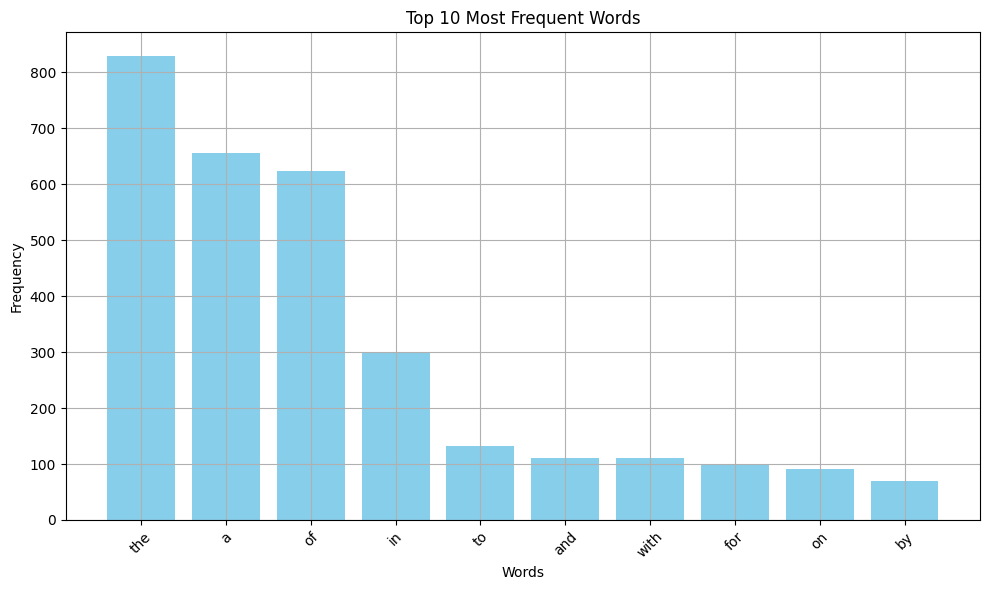

In [55]:
# ✅ Step 9: Visualize top 10 most frequent words
top_10 = word_counts.take(10)
words, counts = zip(*top_10)

plt.figure(figsize=(10,6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eec23428-fdbf-458a-b78d-32fc8718bfba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>